# Worksheet 12

Name:  Jeong Yong Yang, Junho Son
UID: U95912941, U64222022

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Classification
2. Not classification
3. Classification
4. Not classification

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

1. Divide the dataset to train and test (train section with having about 80% of the dataset and the test section with having about 20% of the dataset)
2. With the data of the training set, use the features to train a model.
3. Using the trained model, test (apply) whether the model performs well on the test data.
4. Once testing is completed, if accuracy is good enough, use the model to perform on the data it has never seen.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

*   Underfitting: Model not learning much information regarding the data provided due to the fact that the model created is too simple compared to the structure of data

*   Overfitting: Model learning too much information within the training data and simply memorizes the pattern of the training data, which might cause problems when applying the model in the real-world or the test data.



### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

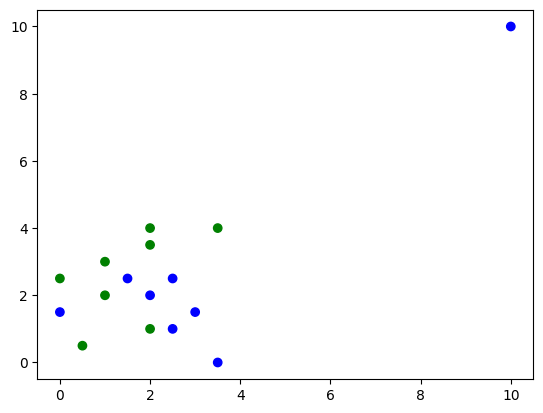

In [ ]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The last data point (10 from Attribute A and 10 from Attribute B) can be a potential outlier since they are very far from the rest of the data points

In [ ]:
data["Attribute A"] = data["Attribute A"][:-1]
data["Attribute B"] = data["Attribute B"][:-1]
data["Class"] = data["Class"][:-1]
print(data["Attribute A"])
print(data["Attribute B"])
print(data["Class"])

[3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0]
[4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The potential noise point is (0, 1.5), which is labeled as class 1 (blue in the scatter plot above) because when trying to classify the blue and green points, the point (0, 1.5) is surrounded by data points that are from class 0 (labeled as color green in the scatter plot above), making it difficult to categorize the data points.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

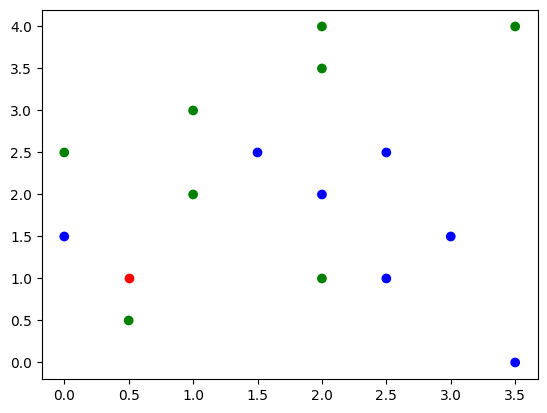

In [ ]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter([0.5], [1], color='red')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

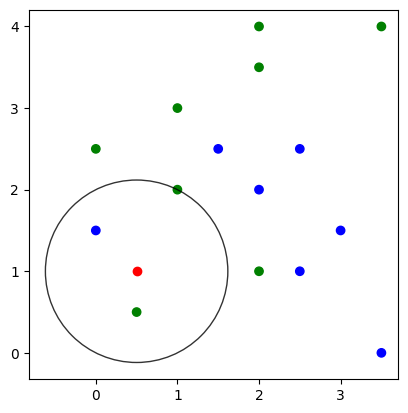

In [ ]:
def eu_dist(x, y):
    return ((x[0]-y[0])**2+(x[1]-y[1])**2)**(1/2)

def n_closest_to(example, n):
  allDistance = [eu_dist(example, points) for points in n]
  sortedDistance = sorted(allDistance)[:3]
  returnList = [(0,0),(0,0),(0,0)]
  for x in range(len(allDistance)):
    if allDistance[x] in sortedDistance:
      returnList[sortedDistance.index(allDistance[x])] = n[x]

  return returnList



location = (0.5, 1)
a = data["Attribute A"]
b = data["Attribute B"]
lstForm = list(zip(a,b))
three_points = n_closest_to(location, lstForm)
radius = eu_dist(three_points[-1], location)
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter([0.5], [1], color='red')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [ ]:
def majority(points):
    one = 0
    zero = 0
    for p in points:
      indexOfPoint = data["Attribute A"].index(p[0])
      classOfThePoint = data["Class"][indexOfPoint]
      if classOfThePoint == 0:
        zero += 1
      else:
        one += 1
    if one > zero:
      return 1
    else:
      return 0

print(majority(three_points))


1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [ ]:
import copy

count = 0
total = len(data["Class"])
for i in range(len(data["Class"])):
    copyList = copy.deepcopy(lstForm)
    actual_class = data["Class"][i]
    value = lstForm[i]
    copyList = copyList.remove(value)
    training_set = n_closest_to(value, lstForm)
    prediction = majority(training_set)
    if prediction == actual_class:
        count += 1

accuracy = count/total

print(f"overall accuracy = {accuracy}")

overall accuracy = 0.9333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml(name="mnist_784", version=1)
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracy_lst = []
test_accuracy_lst = []

for K in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracy_lst.append(train_accuracy)
    test_accuracy_lst.append(test_accuracy)


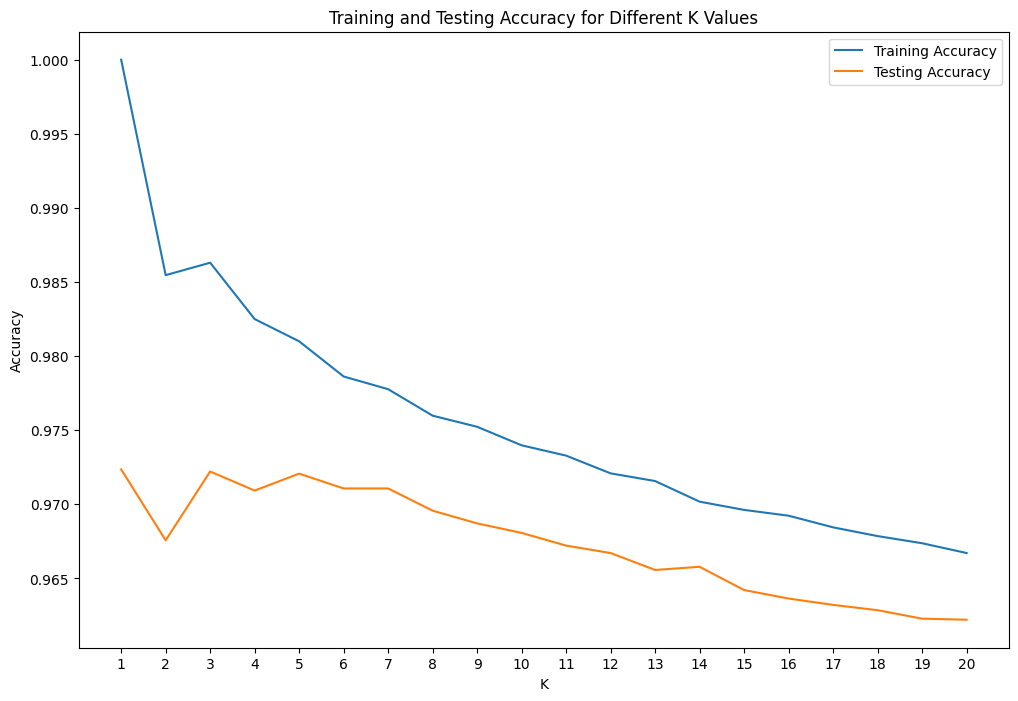

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), train_accuracy_lst, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracy_lst, label='Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different K Values')
plt.legend()
plt.xticks(range(1, 21))
plt.show()

The most optimal k-value is 3. This is because k-value of 1 is not the best option when doing KNN and k-value of 3 provides the highest accuracy among the rest of the k-values ranging from 2 to 20.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

In [ ]:
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

randomNumber = np.random.randint(0, X.shape[0])
randomDigit = X[randomNumber].reshape(28, 28)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicted_label = knn.predict(X_train)


Text(0.5, 1.0, 'Random Image')

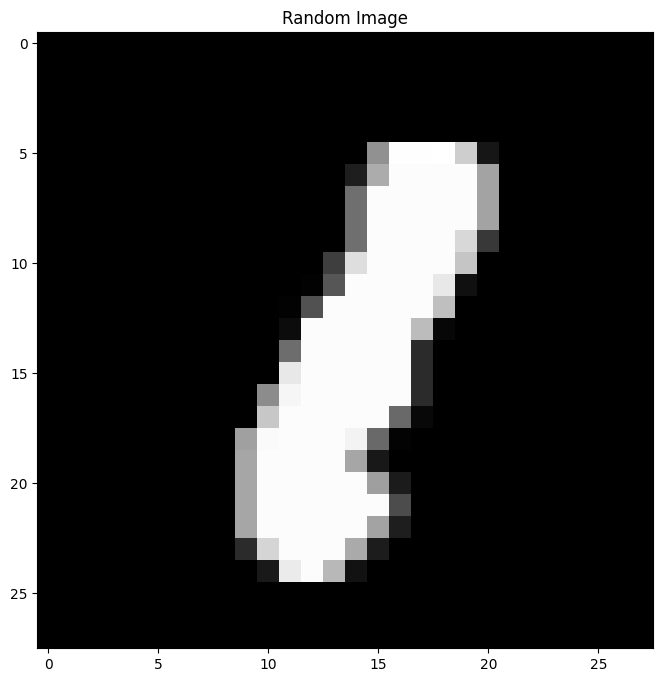

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(randomDigit, cmap='gray')
plt.title("Random Image")

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

u,s,vt=np.linalg.svd(randomDigit,full_matrices=False)
scopy = s.copy()
scopy[5:] = 0.0

train_accuracy_lst = []
test_accuracy_lst = []

model = make_pipeline(scopy, knn)
for K in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracy_lst.append(train_accuracy)
    test_accuracy_lst.append(test_accuracy)

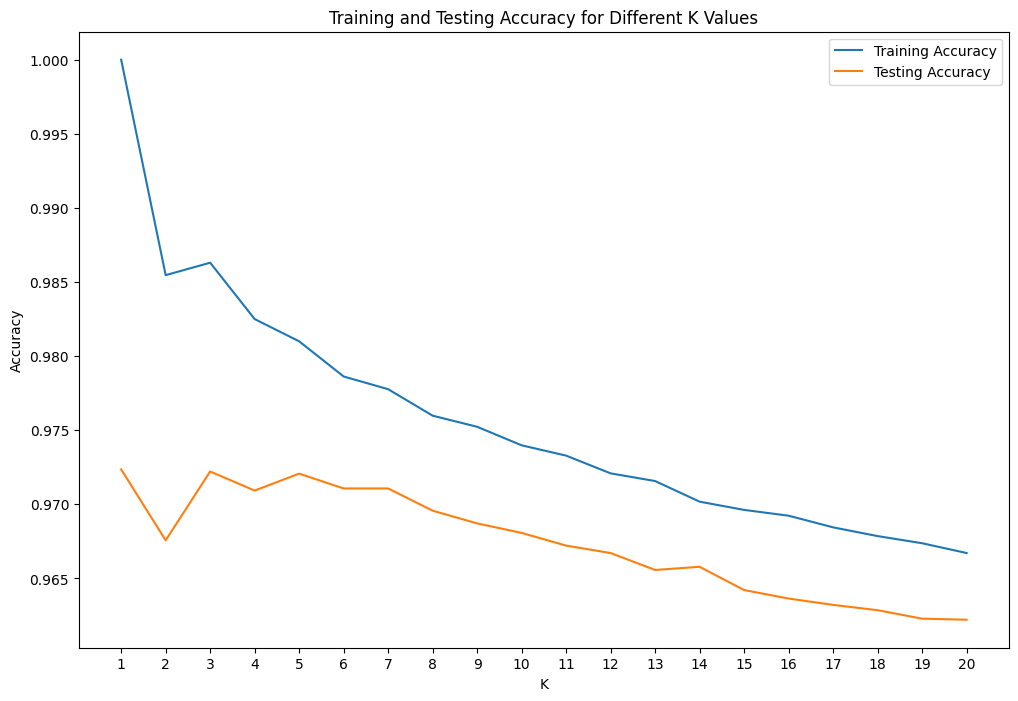

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 21), train_accuracy_lst, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracy_lst, label='Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different K Values')
plt.legend()
plt.xticks(range(1, 21))
plt.show()

I would choose K = 3 here since K = 1, once again, is not the best choice despite the highest accuracy. Excluding K = 1, K = 3 marked the highest training accuracy. The graph has changed since we applied dimensionality reduction. Even though the graph remained the same pattern of constantly decreasing accuracy as the value of K increased, the graph is different from the one above by having a lower training and testing accuracy overall.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

I chose the features 'Survived' and 'Age' since I wanted to see whether there is a relationship between the two categories. I assume that the higher the age, the percentage of survival goes down and wanted to see whether this hypothesis is true.

In [10]:
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

df = pd.read_csv("train.csv")


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
map = {"male": 1, "female": 0}
df["Sex"] = df["Sex"].map(map)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

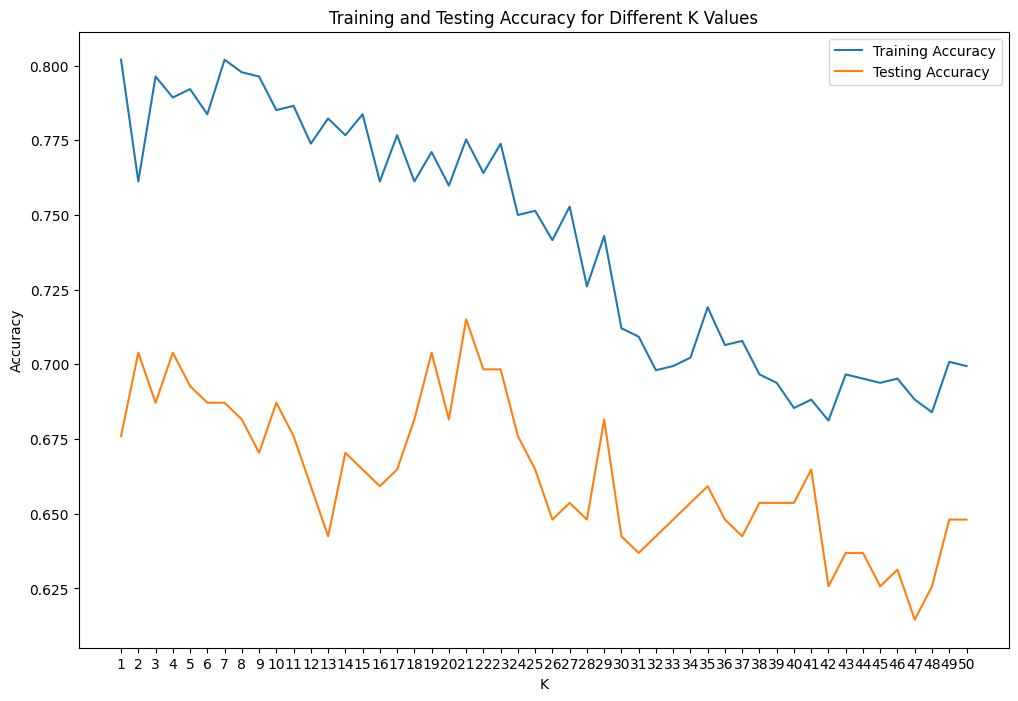

In [22]:
X = df[['Age', 'Sex']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


train_accuracy_lst = []
test_accuracy_lst = []


for K in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracy_lst.append(train_accuracy)
    test_accuracy_lst.append(test_accuracy)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 51), train_accuracy_lst, label='Training Accuracy')
plt.plot(range(1, 51), test_accuracy_lst, label='Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different K Values')
plt.legend()
plt.xticks(range(1, 51))
plt.show()



I ran the process similiar as above after cleaning the data and chose the K-value that has the highest training accuracy except K-value of 1, which is K-value of 7.

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy, test_accuracy)

0.8019662921348315 0.6871508379888268


Submission Link:

https://www.kaggle.com/competitions/titanic/submissions